Táblázat

|szög($^{\circ}$)|csúcs|szórás|terület|csúcs hiba|szórás hiba|terület hiba|idő(s)|Számolt energia(keV)|Mért energia(keV)|Mert energia hiba(keV)| 
|:------:|---:|-----:|------:|------:|-----:|-----:|------:|------:|--:| | | |
|30|8.9730e+01|3.2288e+00|1.6578e+02|3.7380e-01|2.2815e-01|1.1956e+01|1224|5.6382e+02 |5.6091e+02 |2.3366 |
|40|8.2305e+01|3.1082e+00|1.7328e+02|3.6105e-01|4.3538e-01|3.4751e+01|1085|5.0778e+02 |5.0963e+02 |2.2356 |
|50|7.4374e+01|2.4315e+00|1.2005e+02|4.2373e-01|2.7387e-01|1.2494e+01|1002|4.5236e+02 |4.5486e+02 | 2.5914|
|60|6.6148e+01|1.9553e+00|8.4611e+01|4.2954e-01|4.2577e-01|2.5977e+01|962 |4.0158e+02 |3.9805e+02 | 2.5848|
|70|6.0631e+01|1.9307e+00|1.0755e+02|2.4439e-01|2.2981e-01|1.4833e+01|1166|
|80|5.4489e+01|2.3095e+00|1.2137e+02|3.3175e-01|2.0426e-01|1.1257e+01|1100|3.1959e+02 | 3.1753e+02|1.9332 |
|90|5.0916e+01|1.6683e+00|9.9523e+01|3.7857e-01|2.6849e-01|1.7898e+01|977 |2.8827e+02 |2.9286e+02 | 2.1774|
|100|4.66247e+01|1.4583e+00|1.0078e+02|1.8966e-01|1.2546e-01|9.4130e+00|1113|2.6255e+02 |2.6322e+02 |1.0707 |
|110|	4.2805e+01|	1.7196e+00	|1.4046e+02	|1.9500e-01	|1.3387e-01	|1.2151e+01	|1098|

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimization

In [4]:
deg = np.array([30., 40., 50., 60., 70., 80., 90., 100., 110.])
t=np.array([1224., 1085., 1002., 962., 1166., 1100., 977., 1113., 1098.])
E_elm= np.array([5.6382e+02, 5.0778e+02, 4.5236e+02, 4.0158e+02, 3.5722e+02, 3.1959e+02, 2.8827e+02, 2.6255e+02, 2.4164e+02])
dN_mert = np.array([1.6578e+02, 1.7328e+02, 1.2005e+02, 8.4611e+01, 1.0755e+02, 1.2137e+02, 9.9523e+01, 1.0078e+02, 1.4046e+02])
dN_mert_error = np.array([1.1956e+01, 3.4751e+01, 1.2494e+01, 2.5977e+01, 1.4833e+01, 1.1257e+01, 1.7898e+01, 9.4130e+00, 1.2151e+01])

In [5]:
hatasf= 0.98 * np.exp(-4.7 * E_elm/1000) + 0.05*E_elm/1000
szigma_mert = dN_mert/hatasf/t
szigma_mert_err = dN_mert_error/hatasf/t



In [6]:
def szigma_elm(deg_, K):
    E0 = 662
    deg_rad = deg_ * np.pi/180.
    E= E0 * 1/(1+E0/511*(1-np.cos(deg_rad)))
    P=E/E0
    return K * (P-P**2*np.sin(deg_rad)+P**3)

In [7]:
x0=np.array([1.77])
params, cov = optimization.curve_fit(szigma_elm, deg, szigma_mert, sigma=szigma_mert_err)
perr = np.sqrt(np.diag(cov))
print( params, perr)

[1.20758073] [0.0515528]


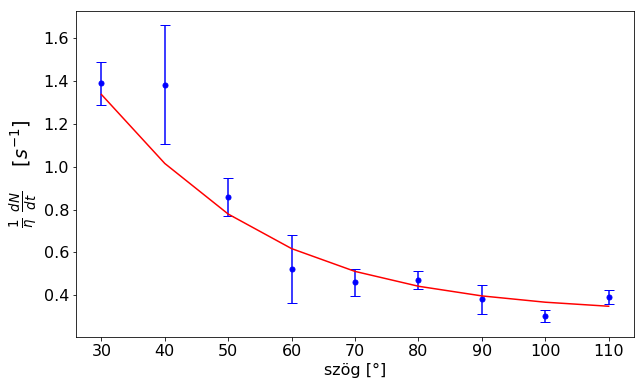

In [8]:
plt.figure(figsize=(10,6))
plt.plot(deg, szigma_mert,  'bo', markersize = 5)
plt.errorbar(deg, szigma_mert, yerr=szigma_mert_err, capsize = 5, color = 'blue', fmt='none' )
plt.plot(deg, szigma_elm(deg, params[0]), color = 'red')
plt.xlabel("szög [°]", fontsize=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.ylabel(r'$\frac{1}{\eta}$ $\frac{dN}{dt}$    [$s^{-1}$]', fontsize=19)
plt.show()

In [9]:
df = 8
chi_sq = (szigma_mert - szigma_elm(deg, params[0]) )**2 / szigma_mert_err**2
chi_sq_sum = chi_sq.sum()
chi_rel = chi_sq_sum / df

chi_sq_sum

11.037360235265663

In [10]:
from scipy.stats import chi2 as chi2

In [11]:
p = chi2.cdf(chi_sq_sum, df)
conf_lev = 1-p
conf_lev

0.19959129001094533

In [12]:
print(chi_sq)

[0.27309541 1.75575831 0.79360672 0.35641291 0.6627836  0.44861326
 0.05140868 5.08736296 1.60831838]


In [19]:
for i in range(0,szigma_mert.size):
    print(deg[i], szigma_elm(deg, params[0])[i], hatasf[i], szigma_mert[i], szigma_mert_err[i], chi_sq[i]) 

30.0 1.3377132434467982 0.09743237382916087 1.390104450375729 0.10025388351243947 0.27309540763393836
40.0 1.0153306858149662 0.11549498347390455 1.3827879300100376 0.27731569341977613 1.7557583112384385
50.0 0.7790353844810107 0.13953456627623226 0.8586430046611682 0.08936181341304984 0.793606718302453
60.0 0.6176107577483059 0.16851094519204363 0.5219436776227592 0.16024548715422834 0.3564129065644003
70.0 0.5111799926772334 0.20070230149651652 0.4595782971477485 0.06338377388742496 0.6627836044518185
80.0 0.4418640803263231 0.23419422861863678 0.47113186472257607 0.04369721843274317 0.4486132628366542
90.0 0.3967278356894383 0.2672349660055961 0.3811848336772953 0.0685514519573991 0.05140868450000057
100.0 0.36732860314199206 0.2984350073246764 0.30340967400452246 0.02833890912288718 5.087362962211153
110.0 0.34844143242398 0.3268527423119042 0.39137960527094684 0.03385770741597091 1.608318377526807
